
# TP1: vision_computadora_I (21Co2025)

# Integrantes

1. Sebastian Biagiola
2. Erlin Rey
3. Daniel Bazán
4. Jonathan Matias Borda

Parte 1 (imágenes en /white_patch):
1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
2. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de
White patch

Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y
visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas
entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección
de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

## Parte 1 (imágenes en /white_patch):
###1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

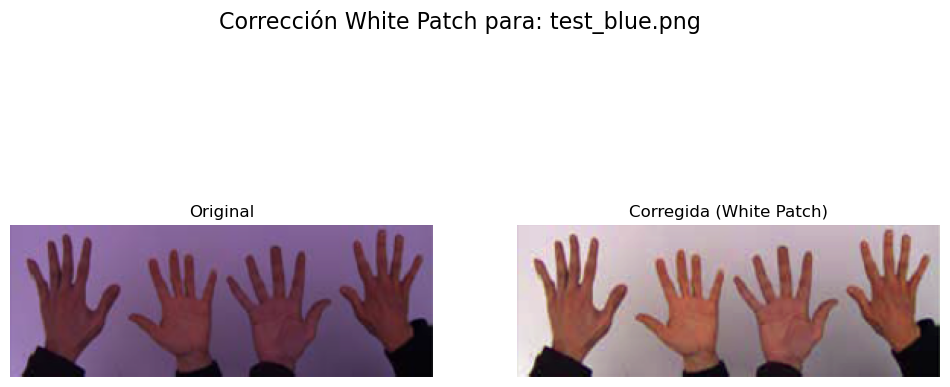

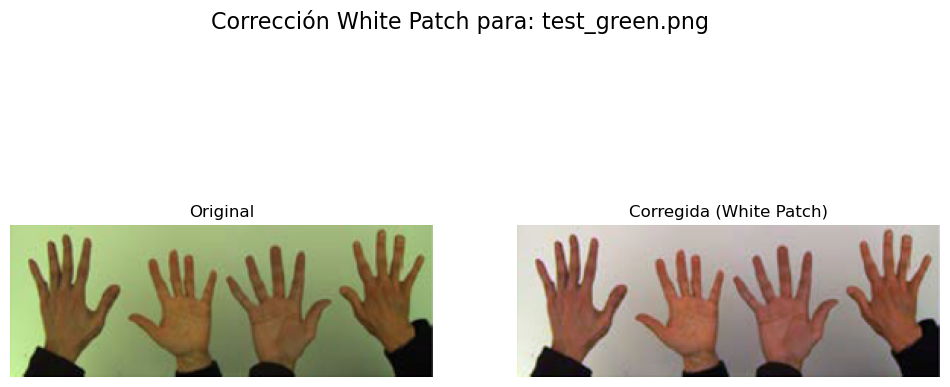

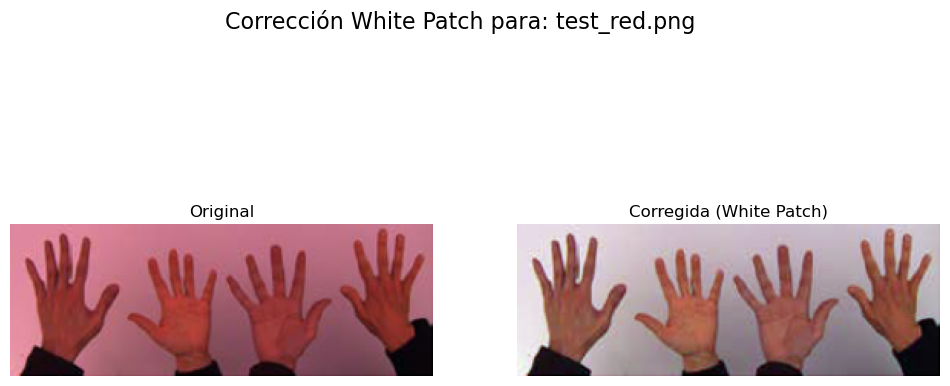

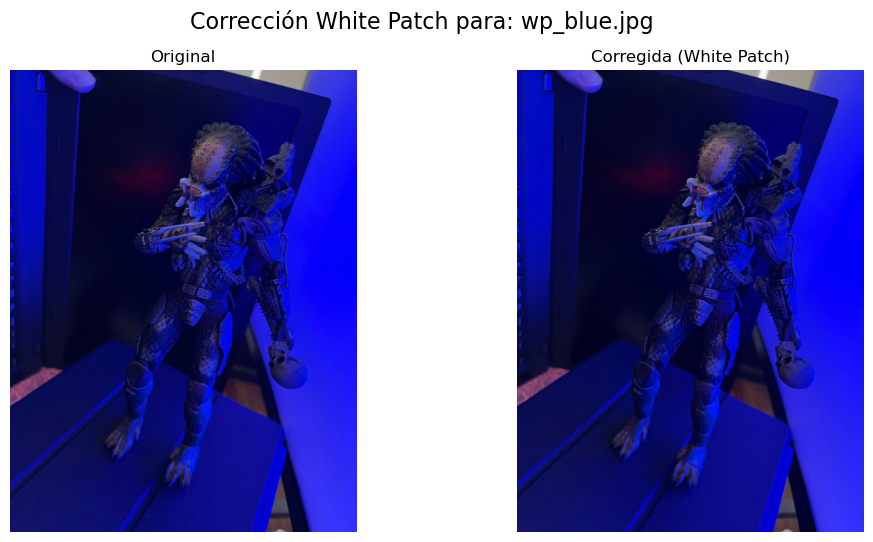

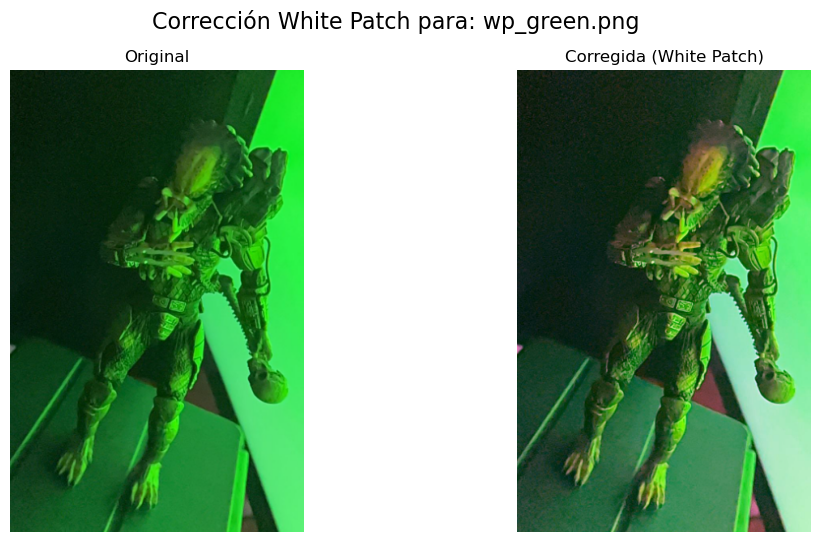

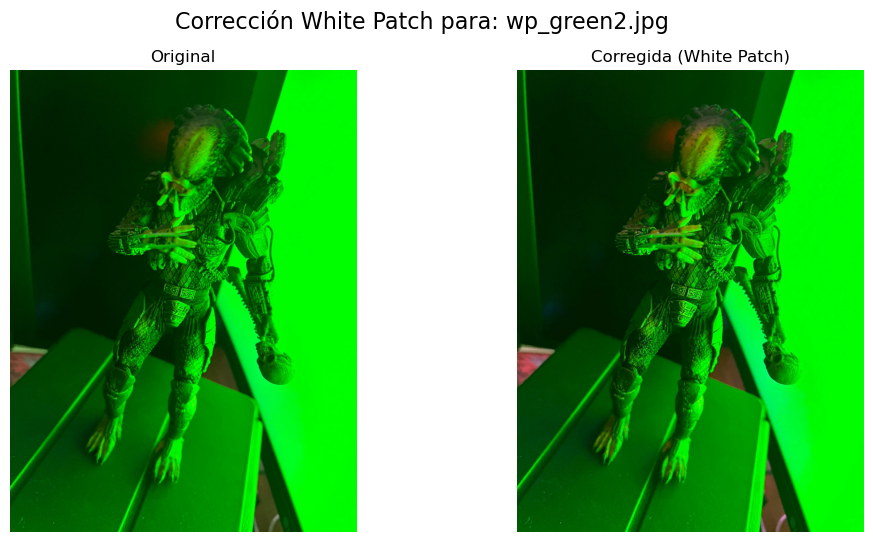

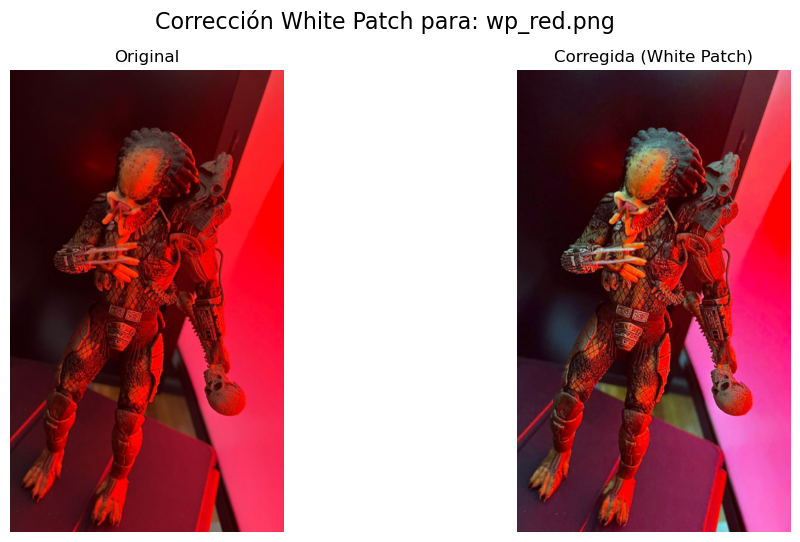

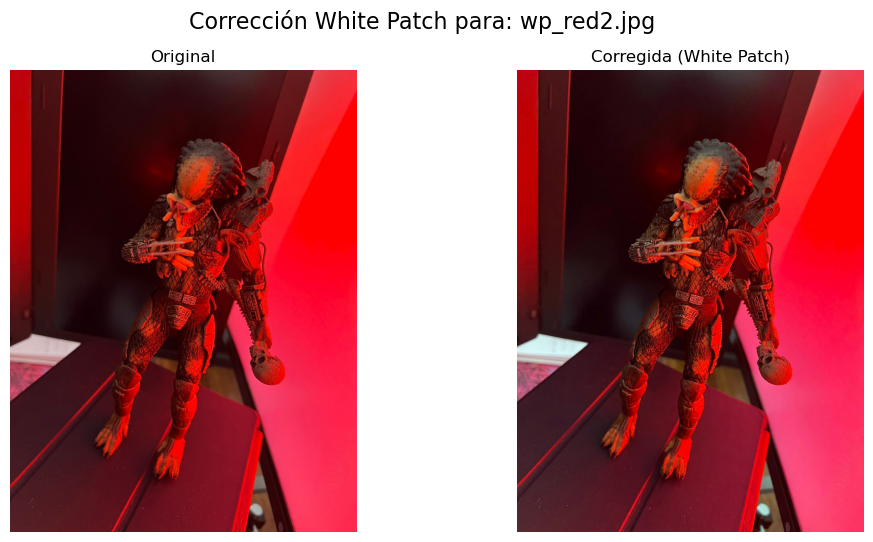

In [ ]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

def algoritmo_white_patch(imagen):
    """
    Aplica el algoritmo de White Patch para el balance de blancos.
    
    Args:
        imagen: La imagen de entrada en formato BGR de OpenCV.
        
    Returns:
        La imagen con el balance de blancos corregido.
    """
    # Dividimos la imagen en sus canales B, G, R
    b, g, r = cv.split(imagen)
    
    # Encontramos el valor máximo en cada canal
    r_max = np.max(r)
    g_max = np.max(g)
    b_max = np.max(b)
    
    # Calculamos el factor de escala para llevar cada máximo a 255
    # Se añade 1e-5 para evitar divisiones por cero si un canal es totalmente negro
    escala_r = 255.0 / (r_max + 1e-5)
    escala_g = 255.0 / (g_max + 1e-5)
    escala_b = 255.0 / (b_max + 1e-5)
    
    # Aplicamos la escala a cada canal.
    # Es importante convertir los canales a un tipo de dato que admita decimales (float)
    # antes de multiplicar, para no perder precisión.
    r_corregido = np.clip(r.astype('float32') * escala_r, 0, 255)
    g_corregido = np.clip(g.astype('float32') * escala_g, 0, 255)
    b_corregido = np.clip(b.astype('float32') * escala_b, 0, 255)
    
    # Unimos los canales corregidos y convertimos de nuevo a enteros de 8 bits
    imagen_corregida = cv.merge([b_corregido, g_corregido, r_corregido]).astype('uint8')
    
    return imagen_corregida


# Ruta a la carpeta con las imágenes
ruta_carpeta = 'white_patch'

# Obtener la lista de imágenes en la carpeta
try:
    nombres_archivos = [f for f in os.listdir(ruta_carpeta) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if not nombres_archivos:
        print(f"No se encontraron imágenes en la carpeta '{ruta_carpeta}'.")
        # Salir si no hay imágenes
        exit()
        
    # Procesar y mostrar cada imagen
    for nombre_archivo in nombres_archivos:
        ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)
        
        # Leer la imagen en color (BGR por defecto en OpenCV)
        img_original = cv.imread(ruta_completa, cv.IMREAD_COLOR)
        
        if img_original is None:
            print(f"No se pudo leer la imagen: {nombre_archivo}")
            continue
            
        # Aplicar el algoritmo
        img_corregida = algoritmo_white_patch(img_original)
        
        # Convertir de BGR a RGB para visualizar correctamente con Matplotlib
        img_original_rgb = cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
        img_corregida_rgb = cv.cvtColor(img_corregida, cv.COLOR_BGR2RGB)
        
        # Visualizar el antes y el después
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        fig.suptitle(f'Corrección White Patch para: {nombre_archivo}', fontsize=16)
        
        axes[0].imshow(img_original_rgb)
        axes[0].set_title('Original')
        axes[0].axis('off')
        
        axes[1].imshow(img_corregida_rgb)
        axes[1].set_title('Corregida (White Patch)')
        axes[1].axis('off')
        
        plt.show()

except FileNotFoundError:
    print(f"Error: No se encontró la carpeta '{ruta_carpeta}'. Asegúrate de que exista en el mismo directorio que el script.")

### Conclusiones sobre la Implementación del Algoritmo White Patch

Se ha implementado el algoritmo de balance de blancos "White Patch" y se ha evaluado su efectividad en un conjunto de imágenes con diversas dominantes de color. El análisis de los resultados demuestra que el rendimiento del algoritmo depende críticamente de las características de la imagen de entrada y del cumplimiento de su hipótesis fundamental.

**1. Casos de Éxito: Corrección Efectiva de Dominantes**

El algoritmo demostró ser **notable y altamente efectivo** en imágenes con una dominante de color clara y uniforme.

* El éxito en estos casos se debe a que las imágenes cumplían con la hipótesis fundamental del algoritmo: la existencia de píxeles muy brillantes (blancos o grises claros) que actúan como un "parche blanco" de referencia. En estas imágenes, los valores máximos de los canales R, G y B correspondían efectivamente a una superficie acromática que reflejaba la luz del ambiente. Esto permitió al algoritmo estimar correctamente el color de la iluminación y calcular los factores de escala necesarios para neutralizar la dominante, resultando en una imagen con colores visiblemente más naturales y balanceados.

**2. Casos de Falla: Violación de la Hipótesis por Objetos de Color Intenso**

Por el contrario, en imágenes como `wp_red.png`, `wp_green.png` y `wp_blue.jpg`, el algoritmo  falló en corregir la dominante de color

* **Análisis de la Causa:** La causa de este fallo radica en la **violación de la hipótesis del "parche blanco"**. En estas imágenes, los píxeles más brillantes no corresponden a una superficie acromática (blanca o gris), sino que pertenecen a **objetos que poseen un color intrínseco muy saturado**. Por ejemplo, en la imagen `wp_red.png`, el valor de `R_max` se encuentra en el objeto rojo, mientras que `G_max` y `B_max` son muy bajos. Lo mismo ocurre con el objeto verde en `wp_green.png` y el azul en `wp_blue.jpg`.  El algoritmo asume erróneamente que este color saturado (rojo, verde o azul) es en realidad el color de la iluminación ambiente. Este comportamiento demuestra que el algoritmo no puede distinguir entre un reflejo blanco teñido por la luz y un objeto que es inherentemente de color.

**3. Síntesis Final**

El algoritmo White Patch es una técnica de balance de blancos simple, rápida y efectiva, pero su fiabilidad depende directamente de que la imagen de entrada se ajuste a su modelo del mundo. Es una herramienta ideal para escenas controladas  donde se puede garantizar la presencia de una referencia blanca o gris. Sin embargo, demuestra ser poco robusto para escenas complejas y naturales  donde el píxel más brillante puede tener una cromaticidad intrínseca, llevando a una estimación incorrecta de la luz y a resultados contraproducentes.

### Se prueba la corrección con otros algoritmos

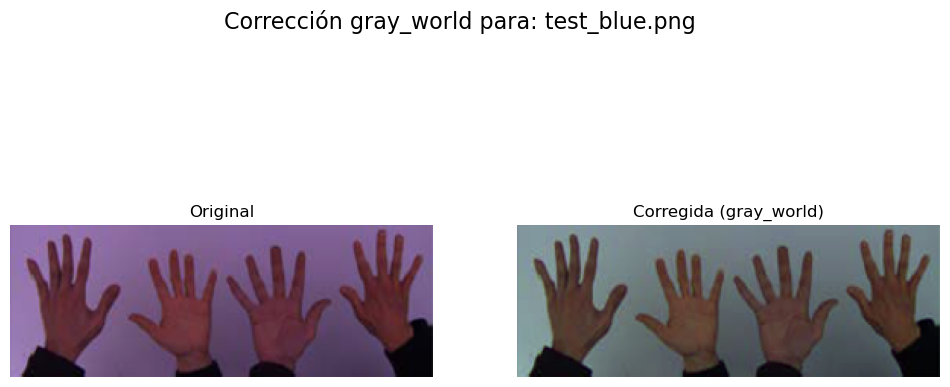

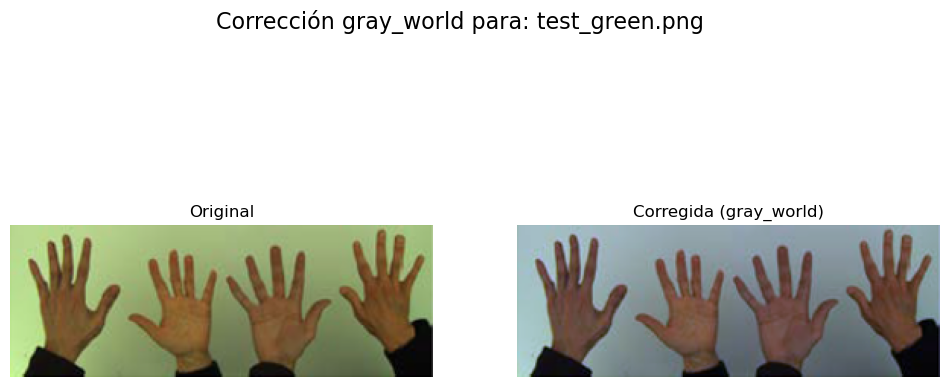

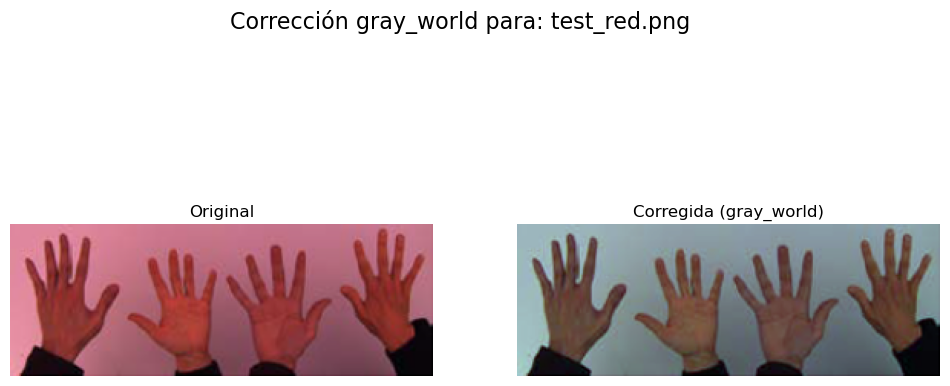

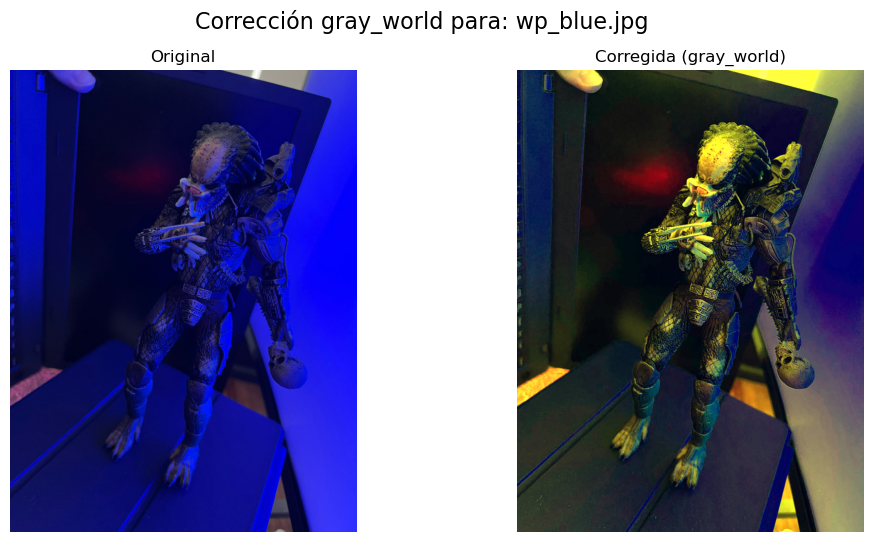

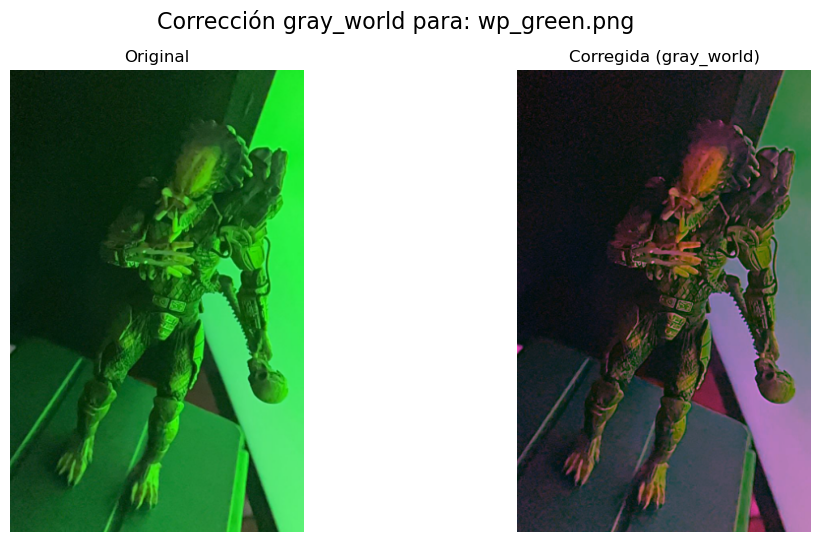

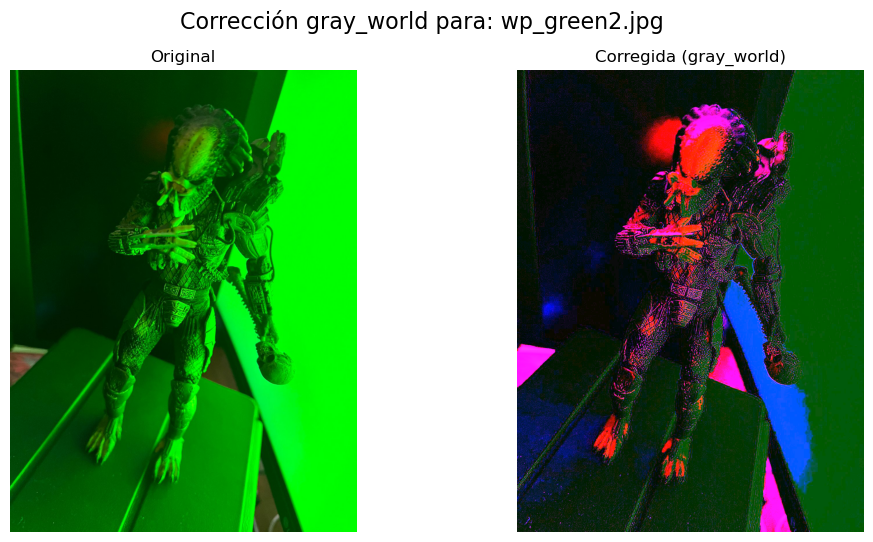

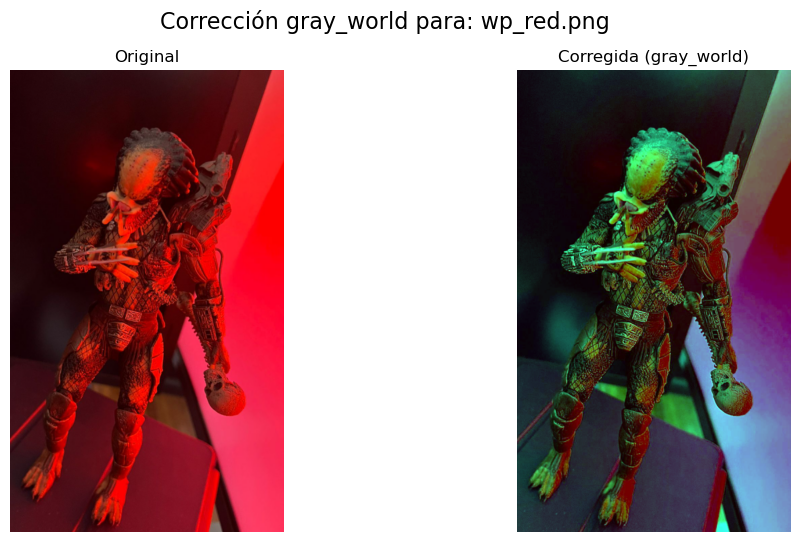

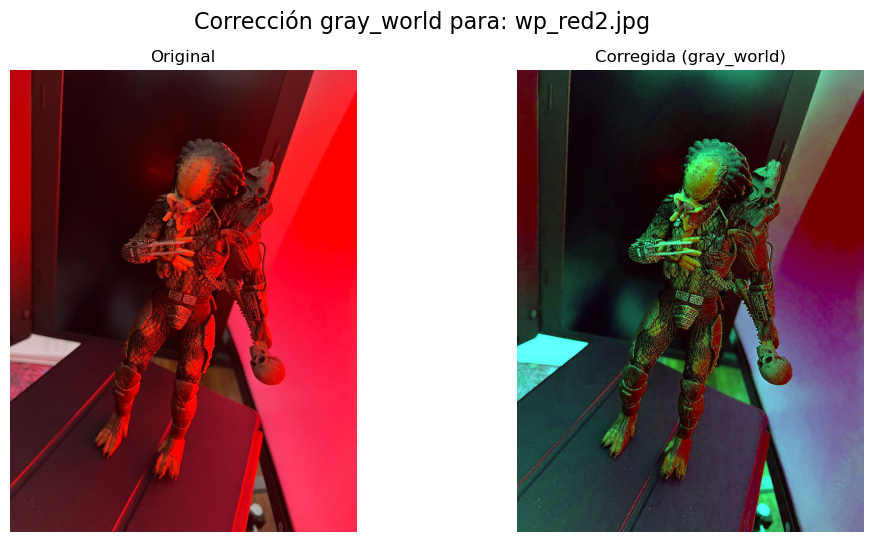

In [24]:
def algoritmo_gray_world(imagen):
    """
    Aplica el algoritmo de Gray World para el balance de blancos.
    
    Args:
        imagen: La imagen de entrada en formato BGR de OpenCV.
        
    Returns:
        La imagen con el balance de blancos corregido.
    """
    # Dividir en canales y convertir a float para los cálculos
    b, g, r = cv.split(imagen.astype("float32"))
    
    # Calcular el promedio de cada canal
    r_avg = np.mean(r)
    g_avg = np.mean(g)
    b_avg = np.mean(b)
    
    # Calcular el promedio de "gris" global
    gris_avg = (r_avg + g_avg + b_avg) / 3
    
    # Calcular los factores de escala
    escala_r = gris_avg / r_avg
    escala_g = gris_avg / g_avg
    escala_b = gris_avg / b_avg
    
    # Aplicar la escala a cada canal
    r_corregido = np.clip(r * escala_r, 0, 255)
    g_corregido = np.clip(g * escala_g, 0, 255)
    b_corregido = np.clip(b * escala_b, 0, 255)
    
    # Unir los canales y convertir a enteros de 8 bits
    imagen_corregida = cv.merge([b_corregido, g_corregido, r_corregido]).astype("uint8")
    
    return imagen_corregida

# Ruta a la carpeta con las imágenes
ruta_carpeta = 'white_patch'

# Obtener la lista de imágenes en la carpeta
try:
    nombres_archivos = [f for f in os.listdir(ruta_carpeta) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if not nombres_archivos:
        print(f"No se encontraron imágenes en la carpeta '{ruta_carpeta}'.")
        # Salir si no hay imágenes
        exit()
        
    # Procesar y mostrar cada imagen
    for nombre_archivo in nombres_archivos:
        ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)
        
        # Leer la imagen en color (BGR por defecto en OpenCV)
        img_original = cv.imread(ruta_completa, cv.IMREAD_COLOR)
        
        if img_original is None:
            print(f"No se pudo leer la imagen: {nombre_archivo}")
            continue
            
        # Aplicar el algoritmo
        img_corregida = algoritmo_gray_world(img_original)
        
        # Convertir de BGR a RGB para visualizar correctamente con Matplotlib
        img_original_rgb = cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
        img_corregida_rgb = cv.cvtColor(img_corregida, cv.COLOR_BGR2RGB)
        
        # Visualizar el antes y el después
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        fig.suptitle(f'Corrección gray_world para: {nombre_archivo}', fontsize=16)
        
        axes[0].imshow(img_original_rgb)
        axes[0].set_title('Original')
        axes[0].axis('off')
        
        axes[1].imshow(img_corregida_rgb)
        axes[1].set_title('Corregida (gray_world)')
        axes[1].axis('off')
        
        plt.show()

except FileNotFoundError:
    print(f"Error: No se encontró la carpeta '{ruta_carpeta}'. Asegúrate de que exista en el mismo directorio que el script.")

### Conclusión Final sobre el Algoritmo "Gray World"

Se ha implementado el algoritmo de balance de blancos "Gray World" como una alternativa al método "White Patch". Su evaluación revela un rendimiento variable que depende directamente de qué tan bien la composición de la imagen se ajusta a la hipótesis fundamental del algoritmo.

La hipótesis del "Mundo Gris" asume que el promedio de todos los colores en una escena con suficiente variedad cromática es un gris neutro. El algoritmo intenta forzar este promedio, lo cual funciona bien en algunas circunstancias, pero puede fallar en otras.

**1. Caso de Éxito (`wp_red2.jpg`)**

En la imagen con la dominante roja, el algoritmo `Gray World` produjo un **resultado excelente**, neutralizando el color de manera efectiva y logrando una imagen final con un balance de blancos muy natural.

* **Análisis de la Causa:** El éxito en este caso se debe a que la imagen, a pesar de su fuerte dominante roja, contiene una **gran variedad de otros colores y tonos** (grises del metal, negros, reflejos blancos). Al promediar todos los píxeles, la fuerte componente roja se balancea con las otras tonalidades presentes, permitiendo que el promedio global sea una buena estimación del "gris" que debería tener la escena. La hipótesis del mundo gris se cumple razonablemente bien.

**2. Caso de Falla (`wp_green2.jpg`)**

Para la imagen `wp_green2.jpg`, el algoritmo **falló notablemente**, resultando en una imagen con una dominante magenta/púrpura que es visualmente peor que la original.

* **Análisis de la Causa:** El fallo se debe a una **violación clara de la hipótesis del mundo gris**. La imagen está compuesta casi en su totalidad por un único color: el verde. No hay una variedad cromática que pueda balancear el promedio. El algoritmo calcula el promedio de la escena (que es abrumadoramente verde) y asume incorrectamente que ese verde debería ser gris. Para "corregirlo", reduce masivamente el canal verde y sobrecompensa los canales rojo y azul, lo que da como resultado el color magenta (rojo + azul) que se observa en la imagen final.

**3. Caso Intermedio (`wp_blue.jpg`)**

El resultado para la imagen `wp_blue.jpg` fue **moderado o aceptable**. La dominante azul se redujo considerablemente, pero la imagen final adquirió una ligera tonalidad cálida/amarillenta.

* **Análisis de la Causa:** En este caso, la hipótesis se cumple a medias. La imagen tiene más variedad de tonos que la imagen verde, pero el azul sigue siendo el color predominante. El algoritmo logra neutralizar la mayor parte del azul, pero la corrección no es perfecta y tiende a sobrecompensar ligeramente hacia el lado opuesto del círculo cromático (el amarillo).

**Síntesis Final**

El algoritmo "Gray World" es una mejora significativa sobre "White Patch" porque no depende de un único píxel de referencia. Sin embargo, su eficacia está directamente ligada a la diversidad de colores en la escena. Funciona de manera excelente en imágenes con una composición cromática rica y variada, pero falla predeciblemente en imágenes monocromáticas o con una fuerte dominancia de un solo color, ya que su hipótesis fundamental deja de ser válida.

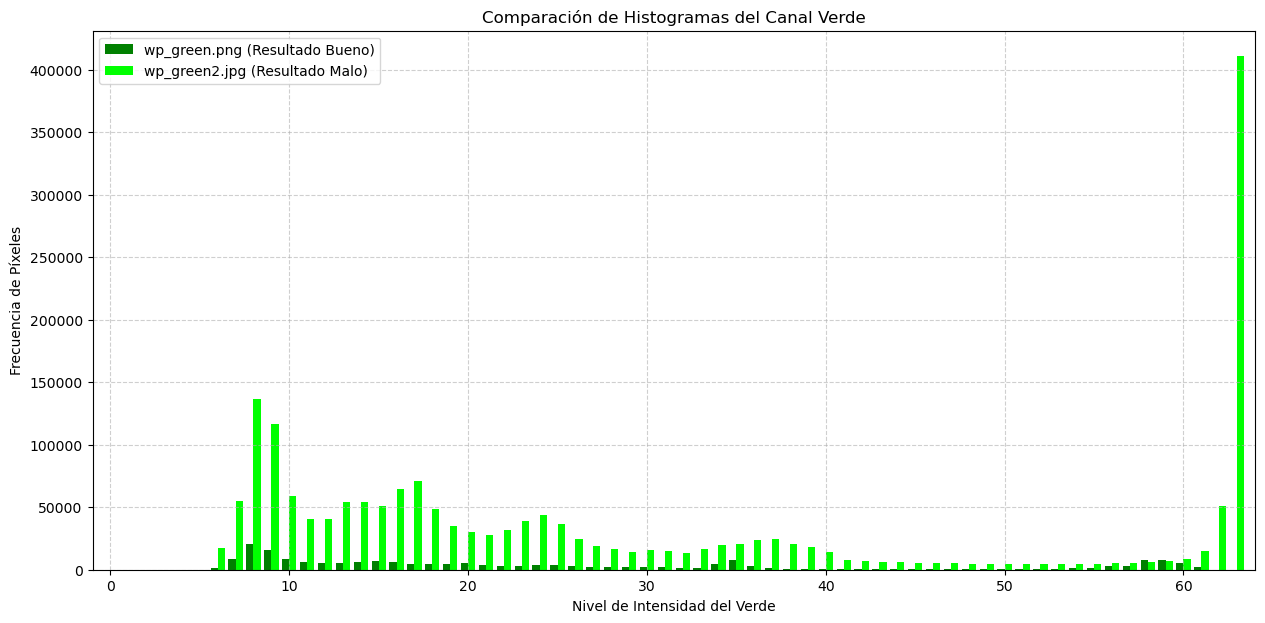

In [32]:

try:
    img_green1_path = 'white_patch/wp_green.png'
    img_green2_path = 'white_patch/wp_green2.jpg'
    
    img_green1 = cv.imread(img_green1_path, cv.IMREAD_COLOR)
    img_green2 = cv.imread(img_green2_path, cv.IMREAD_COLOR)

    if img_green1 is None or img_green2 is None:
        raise FileNotFoundError("Una o ambas imágenes no se pudieron cargar.")

    # --- 2. Definir parámetros para el gráfico ---
    bins = 64
    x_pos = np.arange(bins)
    ancho_barra = 0.4 # Ancho para cada barra individual

    # --- 3. Calcular los histogramas para el CANAL VERDE ---
    # El índice [1] se refiere al canal Verde (B=0, G=1, R=2)
    hist_green1 = cv.calcHist([img_green1], [1], None, [bins], [0, 256])
    hist_green2 = cv.calcHist([img_green2], [1], None, [bins], [0, 256])

    # --- 4. Crear la gráfica comparativa ---
    plt.figure(figsize=(15, 7))
    plt.title('Comparación de Histogramas del Canal Verde')
    plt.xlabel('Nivel de Intensidad del Verde')
    plt.ylabel('Frecuencia de Píxeles')

    # Graficar las barras desplazadas para que aparezcan una al lado de la otra
    plt.bar(x_pos - ancho_barra/2, hist_green1.ravel(), width=ancho_barra, color='green', label='wp_green.png (Resultado Bueno)')
    plt.bar(x_pos + ancho_barra/2, hist_green2.ravel(), width=ancho_barra, color='lime', label='wp_green2.jpg (Resultado Malo)')
    
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim([-1, bins])
    
    plt.show()

except FileNotFoundError as e:
    print(e)
    print("Asegúrate de que las imágenes estén en la subcarpeta 'white_patch'.")

Para profundizar en la causa de la divergencia de resultados del algoritmo `Gray World`, se generó un histograma comparativo de los canales de color verde de las imágenes `wp_green.png` y `wp_green2.jpg`.

Esta visualización confirma la hipótesis anterior: se observa una diferencia fundamental en la distribución de frecuencias del canal verde en cada imagen. aca se puede ver calramente la mayor saturación indicada previamente.

Para reforzar este entendimiento y analizar la composición tonal completa, a continuación se presentará un histograma individual para cada imagen, detallando la distribución de sus tres canales de color (Rojo, Verde y Azul).

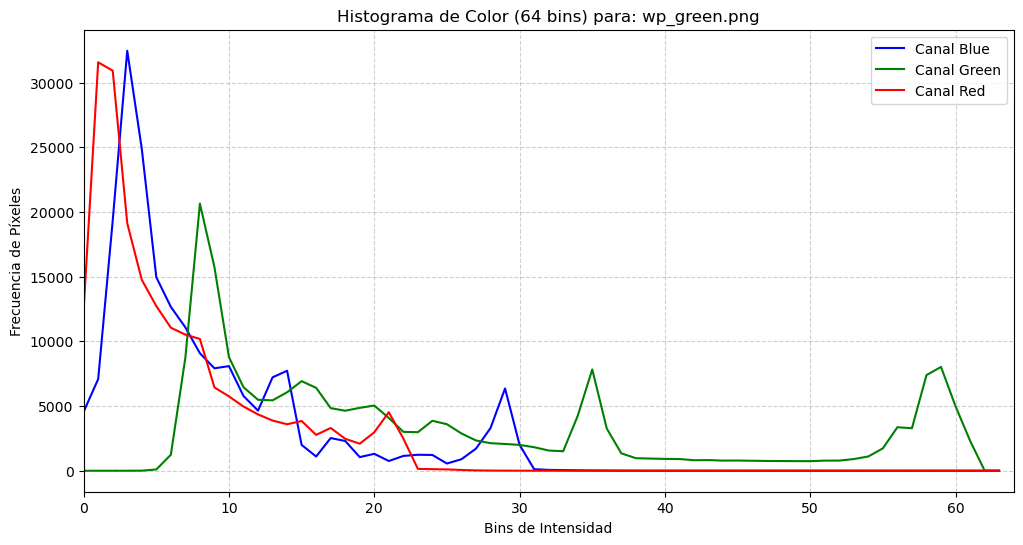

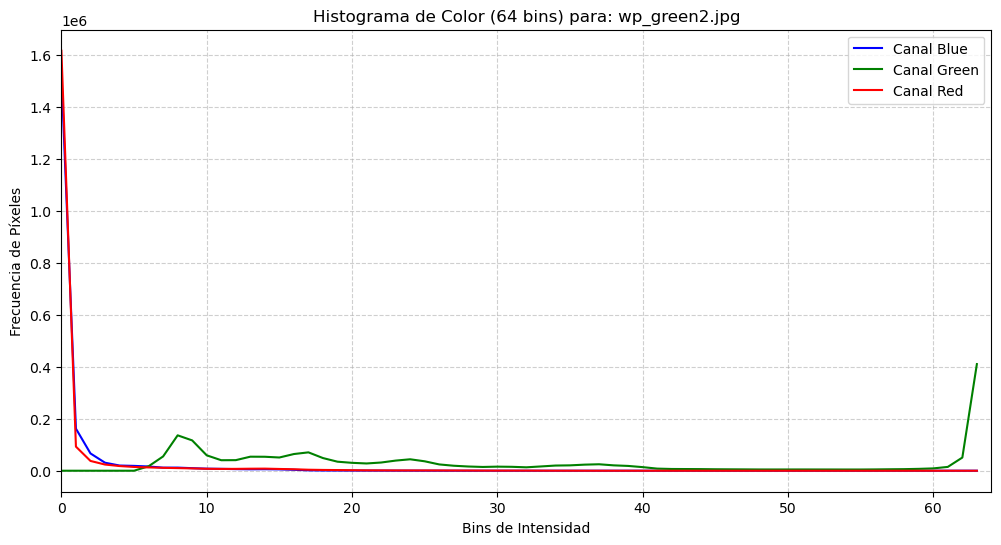

In [41]:
# --- 1. Definir la lista de imágenes a analizar ---
rutas_imagenes = [
    'white_patch/wp_green.png',
    'white_patch/wp_green2.jpg'
]

# --- 2. Definir el número de bins ---
bins = 64 # <--- CAMBIO AQUÍ

# --- 3. Iniciar bucle para procesar cada imagen por separado ---
try:
    for ruta_imagen in rutas_imagenes:
        
        imagen = cv.imread(ruta_imagen, cv.IMREAD_COLOR)
        if imagen is None:
            print(f"Advertencia: No se pudo cargar la imagen: {ruta_imagen}. Saltando a la siguiente.")
            continue

        # --- Crear una nueva figura para la imagen actual ---
        plt.figure(figsize=(12, 6))
        plt.title(f'Histograma de Color ({bins} bins) para: {os.path.basename(ruta_imagen)}')
        plt.xlabel('Bins de Intensidad')
        plt.ylabel('Frecuencia de Píxeles')
        
        colores = ('blue', 'green', 'red')
        
        # --- Calcular y dibujar el histograma para cada canal ---
        for i, color in enumerate(colores):
            # Usamos la variable 'bins' para el cálculo
            histograma = cv.calcHist([imagen], [i], None, [bins], [0, 256])
            
            plt.plot(histograma, color=color, label=f'Canal {color.capitalize()}')

        # --- Finalizar y mostrar el gráfico ---
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        # Ajustamos el límite del eje X al nuevo número de bins
        plt.xlim([0, bins])
        plt.show()

except FileNotFoundError:
    print(f"Error: No se pudo encontrar una de las imágenes. Verifica las rutas.")
    print("Asegúrate de que las imágenes estén en la subcarpeta 'white_patch'.")

Esta gráfica comparativa final permite cuantificar y visualizar la marcada diferencia en la variedad cromática entre ambas imágenes. Los resultados son, por lo tanto, totalmente congruentes con la hipótesis inicial: la distribución tonal más rica de una imagen, en contraposición a la mayor presencia de un solo color  de la otra, es el factor determinante que explica el rendimiento divergente del algoritmo

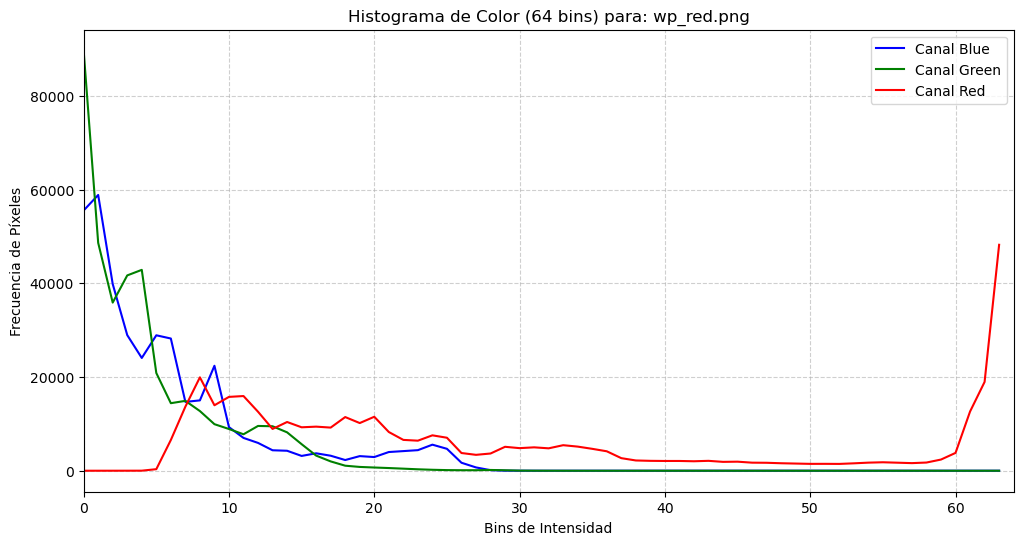

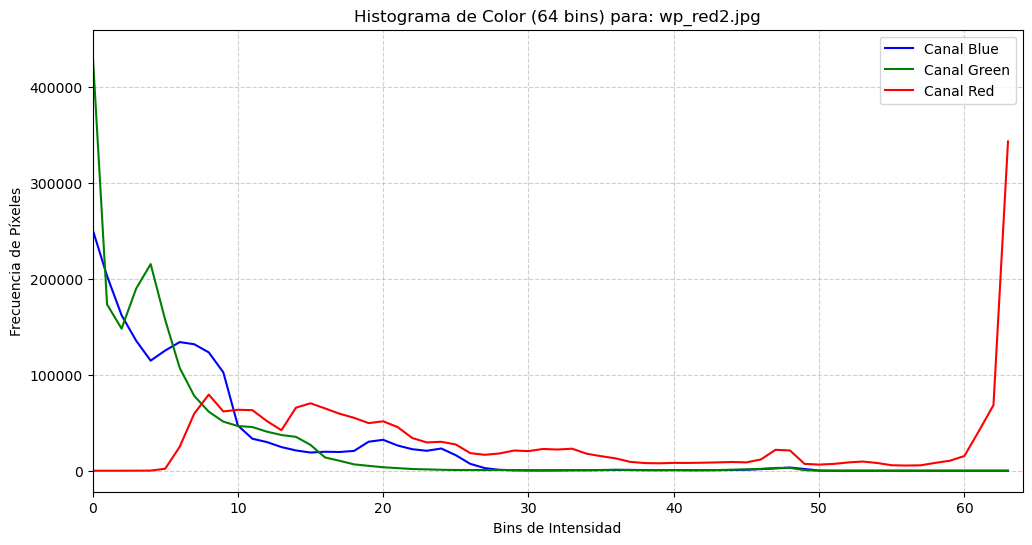

In [39]:
# --- 1. Definir la lista de imágenes a analizar ---
rutas_imagenes = [
    'white_patch/wp_red.png',
    'white_patch/wp_red2.jpg'
]

# --- 2. Definir el número de bins ---
bins = 64 # <--- CAMBIO AQUÍ

# --- 3. Iniciar bucle para procesar cada imagen por separado ---
try:
    for ruta_imagen in rutas_imagenes:
        
        imagen = cv.imread(ruta_imagen, cv.IMREAD_COLOR)
        if imagen is None:
            print(f"Advertencia: No se pudo cargar la imagen: {ruta_imagen}. Saltando a la siguiente.")
            continue

        # --- Crear una nueva figura para la imagen actual ---
        plt.figure(figsize=(12, 6))
        plt.title(f'Histograma de Color ({bins} bins) para: {os.path.basename(ruta_imagen)}')
        plt.xlabel('Bins de Intensidad')
        plt.ylabel('Frecuencia de Píxeles')
        
        colores = ('blue', 'green', 'red')
        
        # --- Calcular y dibujar el histograma para cada canal ---
        for i, color in enumerate(colores):
            # Usamos la variable 'bins' para el cálculo
            histograma = cv.calcHist([imagen], [i], None, [bins], [0, 256])
            
            plt.plot(histograma, color=color, label=f'Canal {color.capitalize()}')

        # --- Finalizar y mostrar el gráfico ---
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        # Ajustamos el límite del eje X al nuevo número de bins
        plt.xlim([0, bins])
        plt.show()

except FileNotFoundError:
    print(f"Error: No se pudo encontrar una de las imágenes. Verifica las rutas.")
    print("Asegúrate de que las imágenes estén en la subcarpeta 'white_patch'.")

Como punto final de este análisis, se replicó el estudio de los histogramas por canal de color sobre las imágenes wp_red.png y wp_red2.jpg, con el objetivo de verificar la causa de su exitosa corrección.

En ambos casos, el análisis de los histogramas confirmó la hipótesis: a pesar de la dominante roja, las imágenes presentan una considerable distribución de frecuencias en los tres canales de color (Rojo, Verde y Azul).

Esta diversidad cromática es la condición necesaria para el correcto funcionamiento del algoritmo "Gray World". La presencia de múltiples tonos permite que el promedio global de la escena se aproxime a un gris neutro, validando la premisa del algoritmo y resultando en un balance de blancos preciso y efectivo.

## Parte 2:
### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

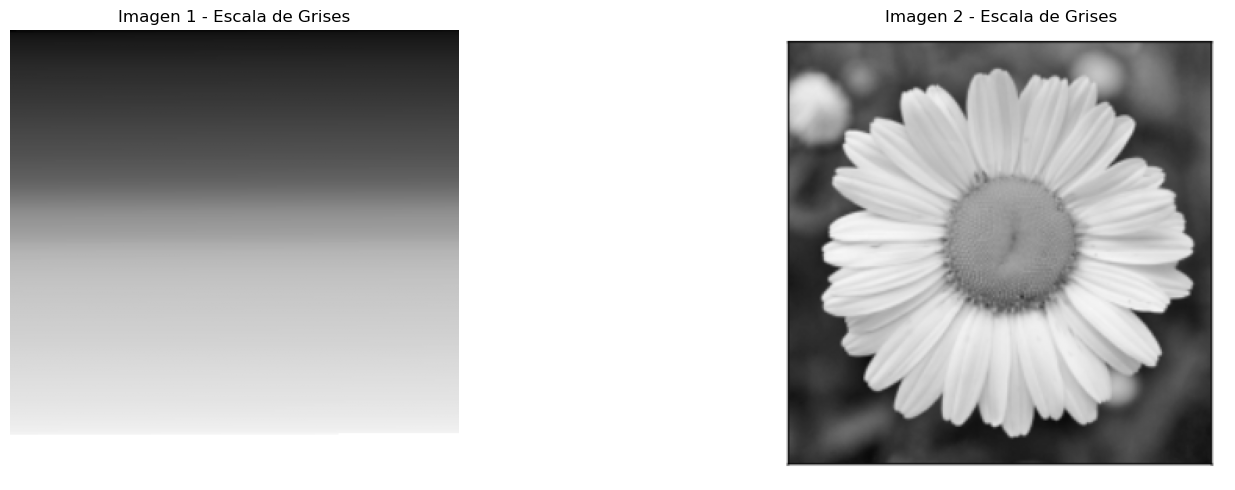

In [ ]:
img1_path = 'img1_tp.png'
img2_path = 'img2_tp.png'

# Leer y visualizar las imágenes en escala de grises
try:
    img1_gray = cv.imread(img1_path, cv.IMREAD_GRAYSCALE)
    img2_gray = cv.imread(img2_path, cv.IMREAD_GRAYSCALE)

    if img1_gray is None or img2_gray is None:
        raise FileNotFoundError("Una o ambas imágenes no se pudieron cargar.")

    # Crear una figura con dos subplots para mostrar ambas imágenes
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))
    
    # Visualizar la primera imagen
    axes[0].imshow(img1_gray, cmap='gray')
    axes[0].set_title('Imagen 1 - Escala de Grises')
    axes[0].axis('off')

    # Visualizar la segunda imagen
    axes[1].imshow(img2_gray, cmap='gray')
    axes[1].set_title('Imagen 2 - Escala de Grises')
    axes[1].axis('off')
    
    # Ajustar el diseño y mostrar la figura
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(e)
    print(f"Verifica que los archivos '{os.path.basename(img1_path)}' y '{os.path.basename(img2_path)}' estén en el directorio correcto.")
    print(f"Asegúrate de que los archivos '{os.path.basename(img1_path)}' y '{os.path.basename(img2_path)}' estén en el directorio correcto.")

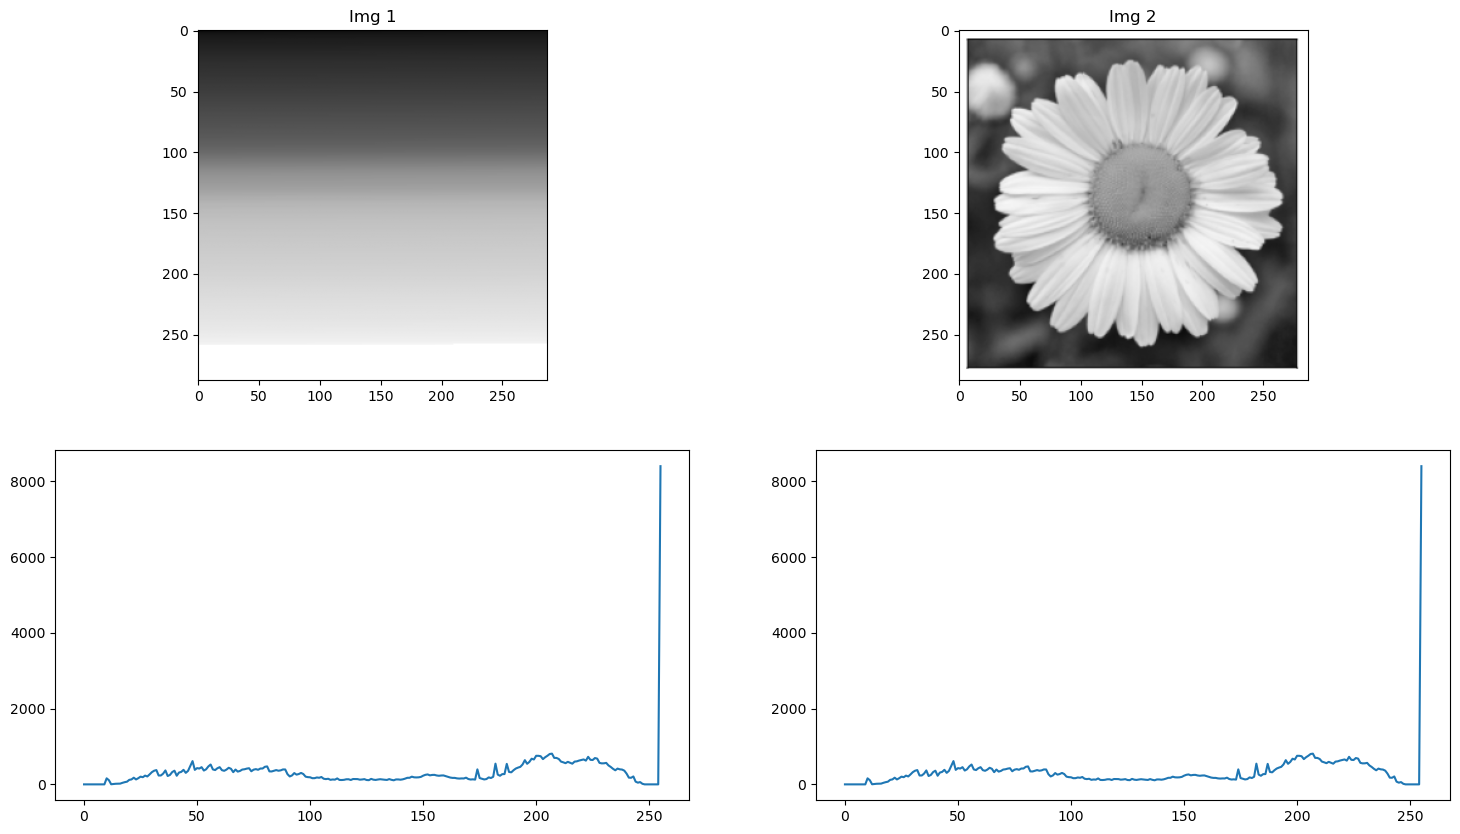

In [3]:
# Nueva figura
fig = plt.figure(figsize=(18, 10))

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img1_gray, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Img 1')

hist1,bins1 = np.histogram(img1_gray.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# Imagen ecualizada
ax2=plt.subplot(222)
ax2.imshow(img2_gray, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Img 2')

hist2,bins2 = np.histogram(img2_gray.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

plt.show()

#

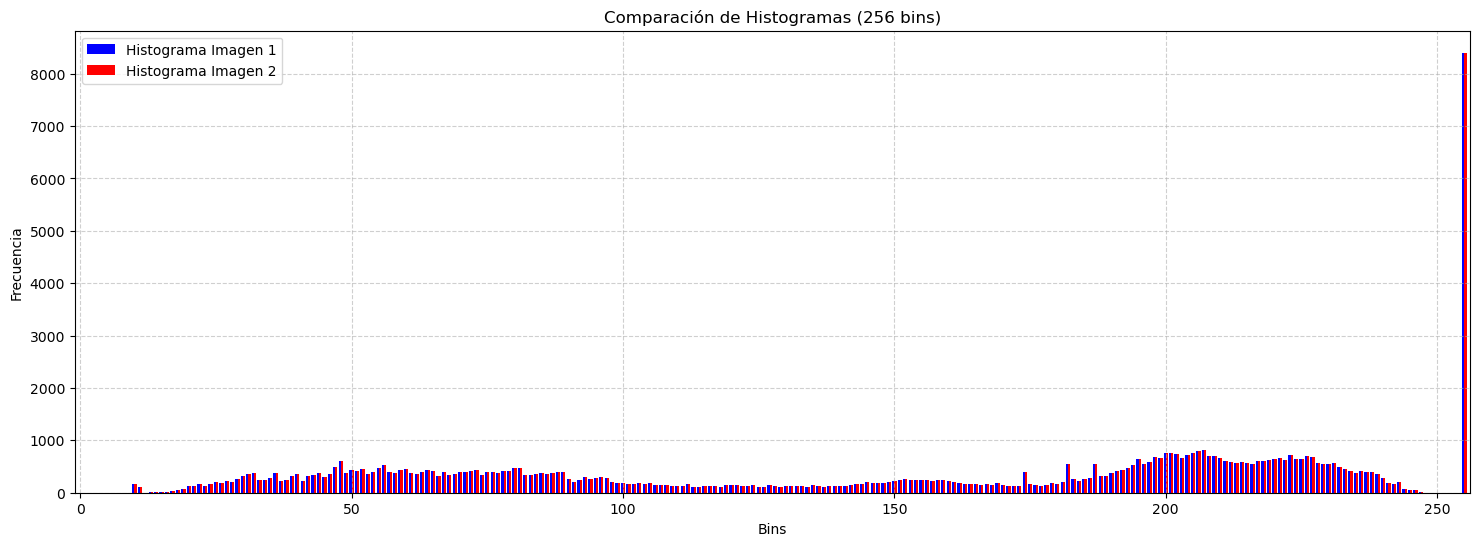

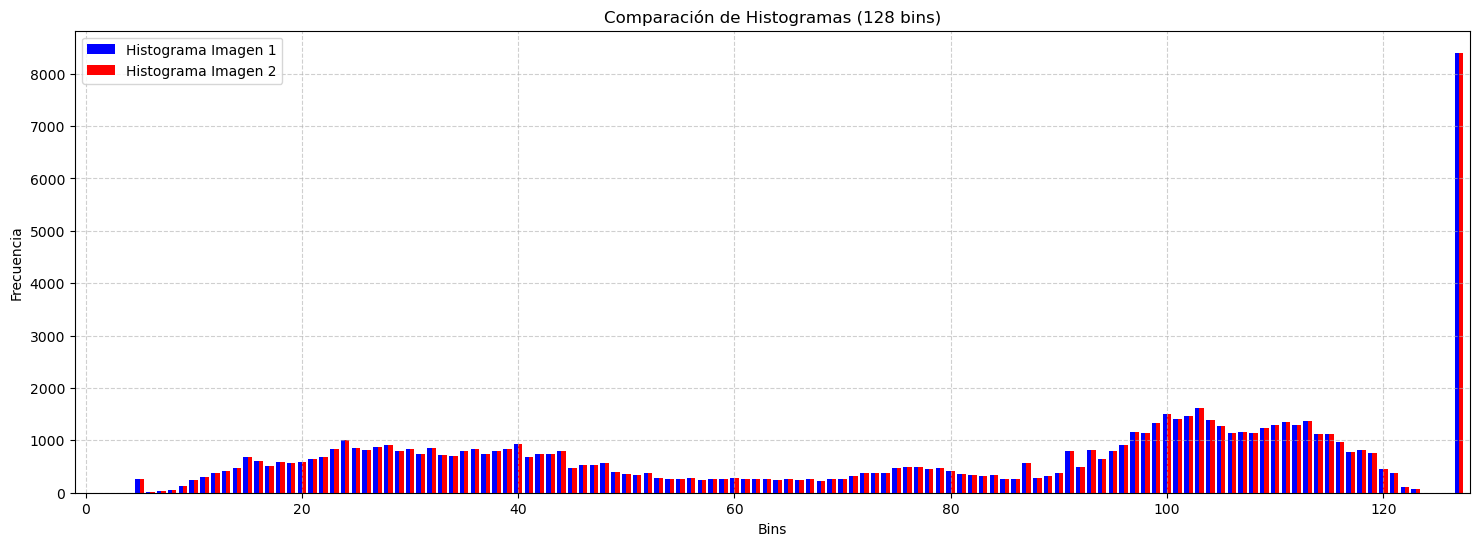

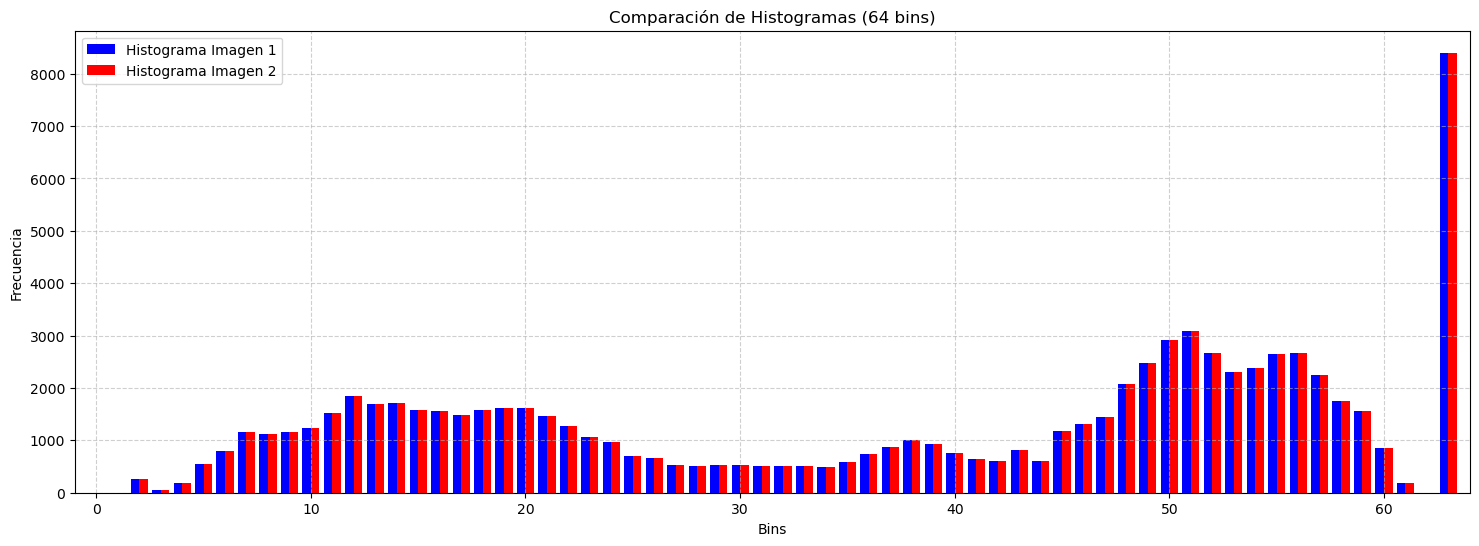

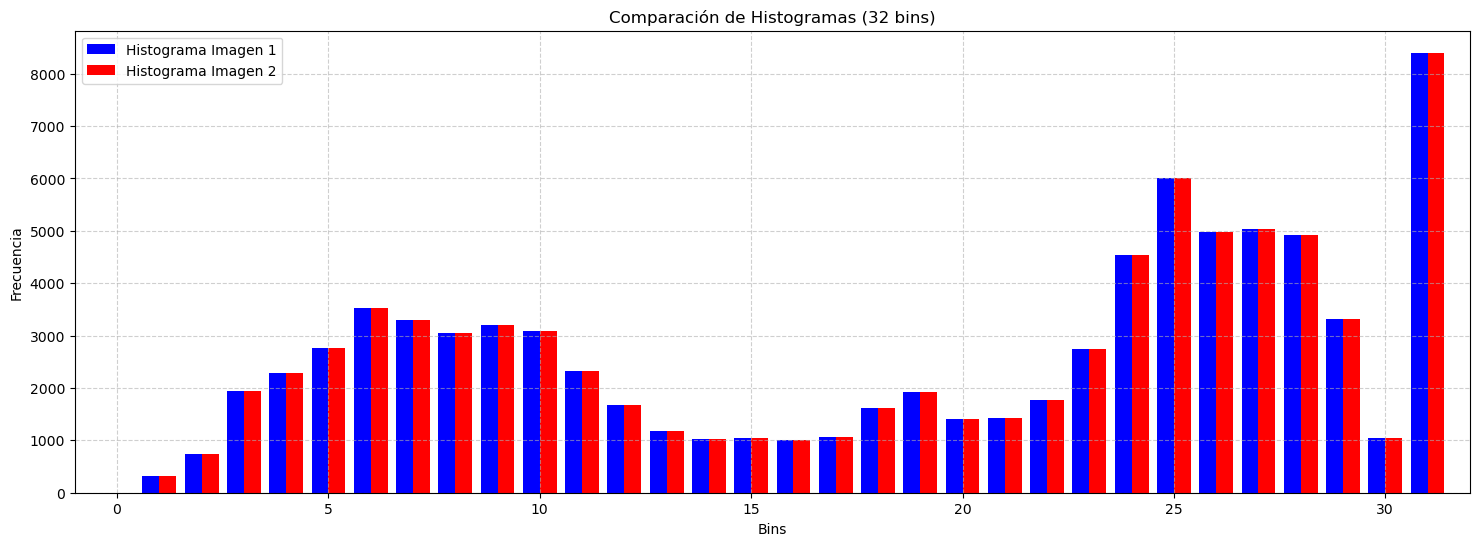

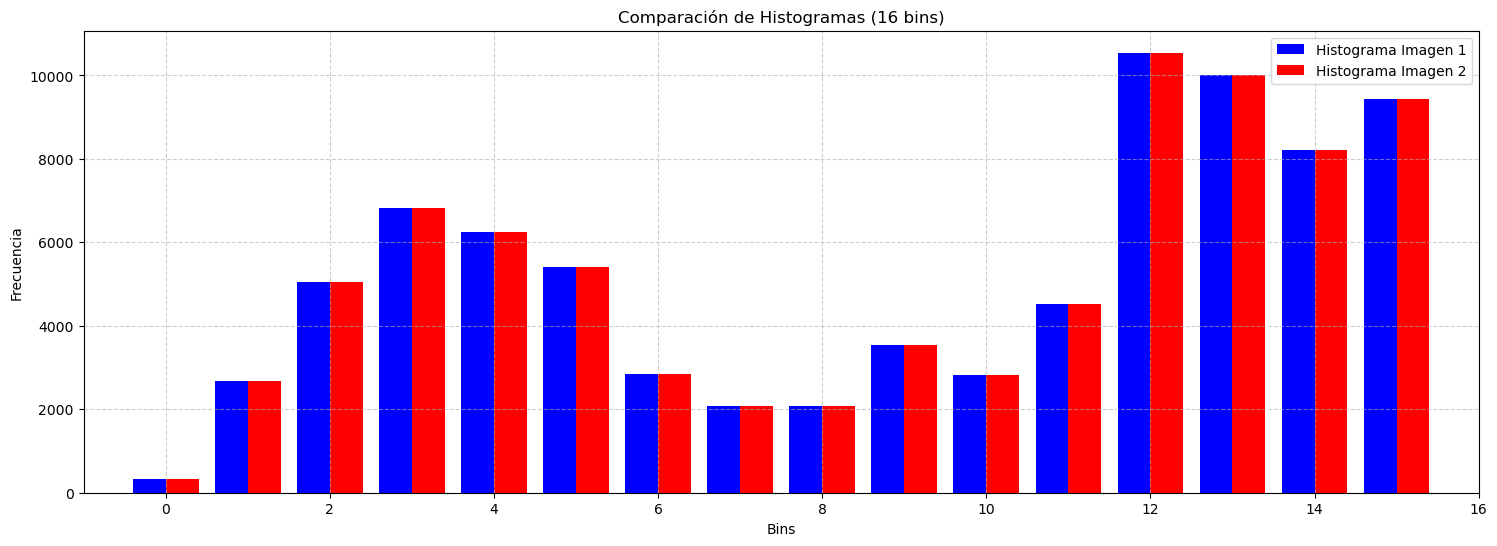

In [4]:

bin_options = [256, 128, 64, 32, 16]


for bins in bin_options:
    # --- Cálculos específicos para esta iteración ---
    # Posiciones en el eje X para cada bin
    x_pos = np.arange(bins)
    # Ancho de cada barra individual
    ancho_barra = 0.4
    
    
    plt.figure(figsize=(18, 6))
    
    # Calcular ambos histogramas con el número actual de bins
    hist1, _ = np.histogram(img1_gray.ravel(), bins, [0, 256])
    hist2, _ = np.histogram(img2_gray.ravel(), bins, [0, 256])

   
    plt.bar(x_pos - ancho_barra/2, hist1, width=ancho_barra, color='blue', label='Histograma Imagen 1')
    # Dibujamos las barras del Histograma 2, desplazadas a la derecha
    plt.bar(x_pos + ancho_barra/2, hist2, width=ancho_barra, color='red', label='Histograma Imagen 2')

    
    plt.title(f'Comparación de Histogramas ({bins} bins)')
    plt.xlabel('Bins')
    plt.ylabel('Frecuencia')
    plt.xlim([-1, bins])
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    
    plt.show()

### Elección del Número de Bins

Para determinar la representación más adecuada de la distribución de intensidades de las imágenes `img1_tp.png` y `img2_tp.png`, se generaron histogramas comparativos utilizando diferentes resoluciones: 256, 128, 64, 32 y 16 bins. El objetivo era encontrar un balance entre la fidelidad a los datos y la claridad visual para la interpretación.

El análisis de los resultados arrojó las siguientes observaciones:

* **Alta Resolución (256 y 128 bins):** Si bien estas configuraciones ofrecen la máxima fidelidad a los datos, la alta variabilidad o "ruido" en la frecuencia de bins adyacentes dificulta la identificación de la tendencia general de la distribución. La forma subyacente de los histogramas queda parcialmente oculta por la gran cantidad de picos.

* **Baja Resolución (32 y 16 bins):** En el extremo opuesto, estas configuraciones agrupan excesivamente los niveles de gris, resultando en una pérdida significativa de información. La forma característica de las distribuciones se desdibuja, y solo se puede apreciar una tendencia muy generalizada, sacrificando detalles estructurales importantes.

* **Resolución Óptima (64 bins):** Se ha determinado que un tamaño de **64 bins** representa el balance óptimo para este caso de estudio. Esta configuración logra:
    * Suavizar eficazmente el ruido presente en las versiones de mayor resolución.
    * Preservar con claridad las características fundamentales de las distribuciones, como la ubicación de sus picos principales y su dispersión general.
    * Facilitar una comparación visual directa y clara entre los dos histogramas, permitiendo una interpretación más sencilla de sus diferencias.

Por lo tanto, se concluye que para futuros análisis o extracción de características de estas imágenes, se recomienda utilizar una resolución de **64 bins**, ya que ofrece la representación más útil y legible de la distribución de intensidades sin sacrificar detalles estructurales clave.

Text(0, 0.5, 'Frecuencia')

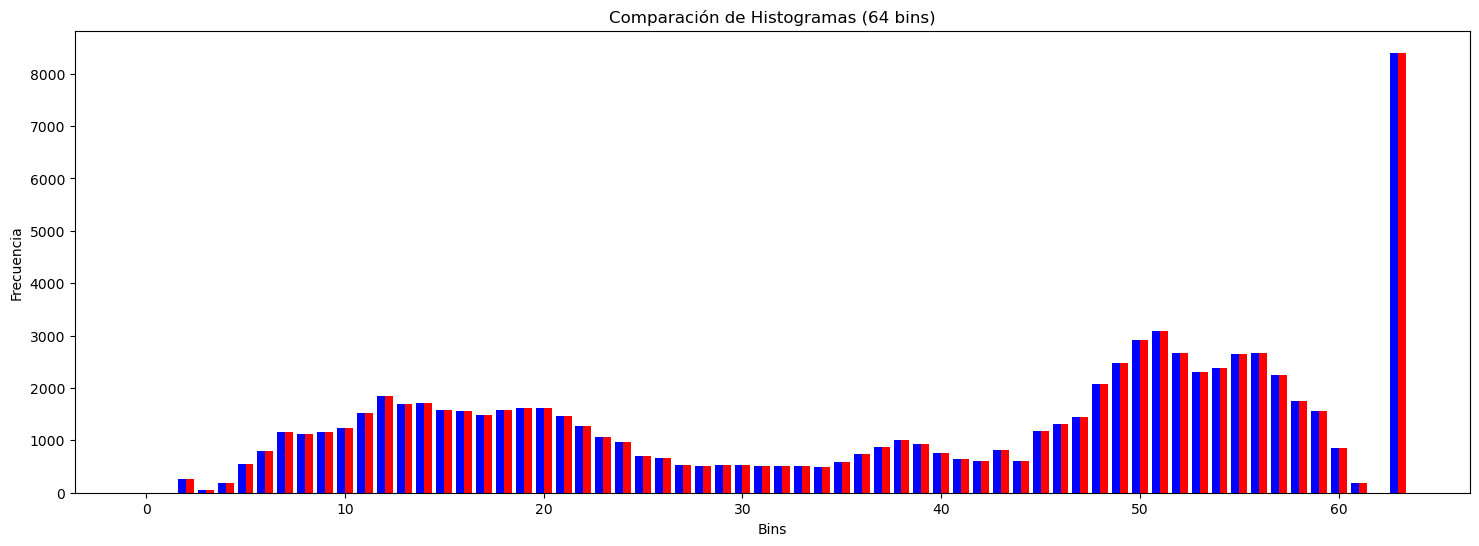

In [5]:

bins = 64
x_pos = np.arange(bins)
ancho_barra = 0.4
plt.figure(figsize=(18, 6))


hist1, _ = np.histogram(img1_gray.ravel(), bins, [0, 256])
hist2, _ = np.histogram(img2_gray.ravel(), bins, [0, 256])

plt.bar(x_pos - ancho_barra/2, hist1, width=ancho_barra, color='blue', label='Histograma Imagen 1')
plt.bar(x_pos + ancho_barra/2, hist2, width=ancho_barra, color='red', label='Histograma Imagen 2')

plt.title(f'Comparación de Histogramas ({bins} bins)')
plt.xlabel('Bins')
plt.ylabel('Frecuencia')




## Observaciones de la comparación de histogramas

Un análisis profundo de las imágenes `img1_tp.png` y `img2_tp.png` revela un fenómeno de gran interés para la visión por computadora: a pesar de ser dos imágenes visualmente distintas en cuanto a la disposición espacial de sus elementos, sus histogramas de intensidad son estadísticamente idénticos. Como se demostró en la gráfica comparativa, las distribuciones de frecuencia de los niveles de gris para ambas imágenes coinciden bin a bin. Esto confirma que ambas comparten las mismas propiedades tonales globales: son igualmente oscuras, poseen el mismo contraste y tienen una idéntica composición de valores de píxeles en general.

* El histograma es claramente **bimodal**:  
  - Un pico en intensidades **altas** 
  - Un pico en intensidades **bajas**  
  - Escasa presencia en los niveles intermedios.  

## Utilidad de los histogramas como *features*

- **Sí son útiles** como representación global:  
  - Capturan información sobre **brillo, contraste y textura general**.  
  - Permiten distinguir escenas con distribuciones de intensidades diferentes (ej. día/noche, radiografías con distintos contrastes, imágenes sintéticas vs. naturales).

- **Limitaciones:**  
  - No capturan información **espacial** (ubicación de los píxeles de cada intensidad).  
  - Son sensibles a variaciones de **iluminación y exposición**.  

- **Buenas prácticas para usarlos en ML:**  
  - Normalizar los histogramas (ej. L1 → suma = 1) para compararlos entre imágenes de distinto tamaño.  
  - Dividir la imagen en **bloques** (ej. 2×2) y concatenar los histogramas para añadir información espacial.  
  - Complementar con otros descriptores como **LBP/GLCM** (textura), **HOG** (forma), o emplear **CNNs** que aprenden *features* automáticamente.  
  - Para comparar histogramas, usar métricas como **Bhattacharyya**, **χ²** o **intersección**.

---

## Conclusión
Los histogramas de intensidades en escala de grises son un **feature simple pero informativo** que resulta útil en tareas de clasificación o detección básicas.  
No obstante, para problemas más complejos es recomendable combinarlos con métodos que capturen información local y espacial.


### A continuación se procede a realizar algunos tratamientos de ecualización vistos en clase

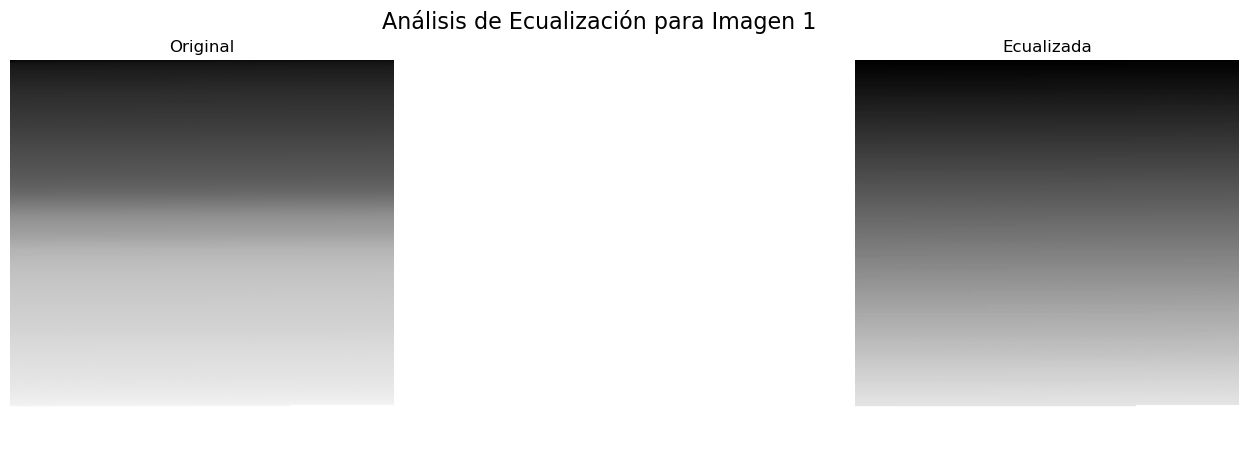

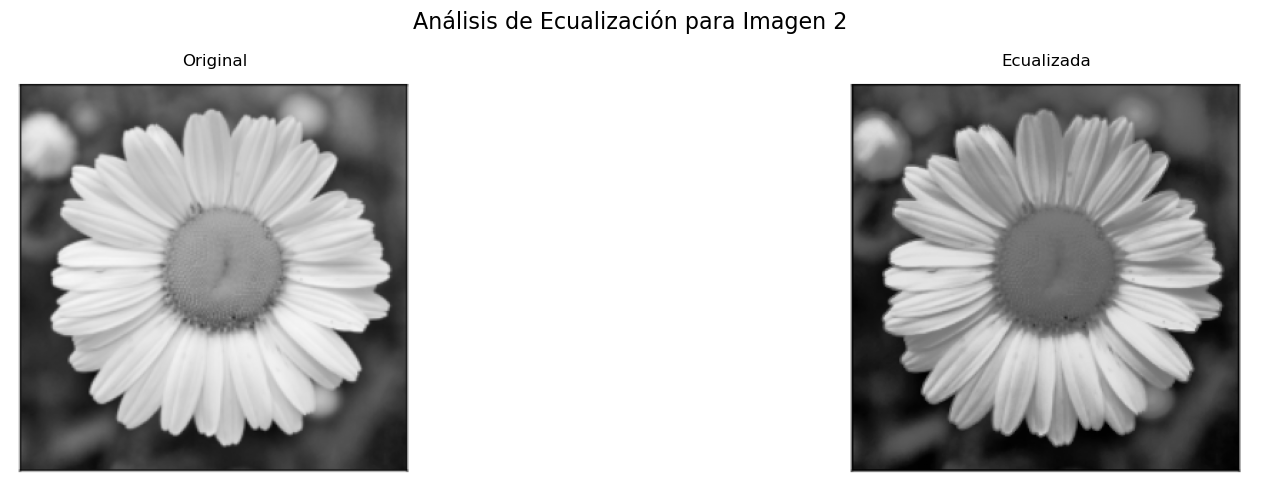

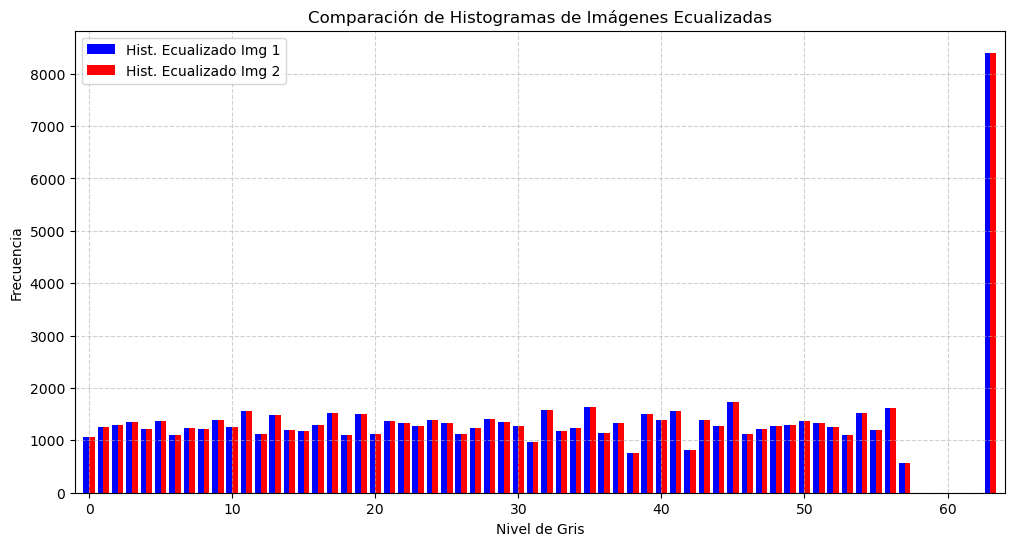

In [ ]:
bins = 64
x_pos = np.arange(bins)
ancho_barra = 0.4

# ==================================================================
# ANÁLISIS PARA IMAGEN 1
# ==================================================================

# 1. Crear la figura y los 3 subplots para la Imagen 1
fig1, axes1 = plt.subplots(1, 2, figsize=(20, 5))
fig1.suptitle('Análisis de Ecualización para Imagen 1', fontsize=16)

# 2. Ecualizar la imagen y calcular ambos histogramas
img1_eq = cv.equalizeHist(img1_gray)
hist1_orig, _ = np.histogram(img1_gray.ravel(), bins, [0, 256])
hist1_eq, _ = np.histogram(img1_eq.ravel(), bins, [0, 256])

# 3. Mostrar las imágenes
axes1[0].imshow(img1_gray, cmap='gray', vmin=0, vmax=255)
axes1[0].set_title('Original')
axes1[0].axis('off')

axes1[1].imshow(img1_eq, cmap='gray', vmin=0, vmax=255)
axes1[1].set_title('Ecualizada')
axes1[1].axis('off')


# ==================================================================
# ANÁLISIS PARA IMAGEN 2
# ==================================================================

# 1. Crear la figura y los 3 subplots para la Imagen 2
fig2, axes2 = plt.subplots(1, 2, figsize=(20, 5))
fig2.suptitle('Análisis de Ecualización para Imagen 2', fontsize=16)

# 2. Ecualizar la imagen y calcular ambos histogramas
img2_eq = cv.equalizeHist(img2_gray)
hist2_orig, _ = np.histogram(img2_gray.ravel(), bins, [0, 256])
hist2_eq, _ = np.histogram(img2_eq.ravel(), bins, [0, 256])

# 3. Mostrar las imágenes
axes2[0].imshow(img2_gray, cmap='gray', vmin=0, vmax=255)
axes2[0].set_title('Original')
axes2[0].axis('off')

axes2[1].imshow(img2_eq, cmap='gray', vmin=0, vmax=255)
axes2[1].set_title('Ecualizada')
axes2[1].axis('off')


plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.bar(x_pos - ancho_barra/2, hist1_eq, width=ancho_barra, color='blue', label='Hist. Ecualizado Img 1')
plt.bar(x_pos + ancho_barra/2, hist2_eq, width=ancho_barra, color='red', label='Hist. Ecualizado Img 2')

plt.title('Comparación de Histogramas de Imágenes Ecualizadas')
plt.xlabel('Nivel de Gris')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim([-1, bins])

plt.show()



Como se estableció en el análisis previo, en el punto de partida se tienen dos imágenes que son visualmente distintas en cuanto a la disposición espacial de sus elementos, pero que comparten un histograma de origen idénticamente distribuido. Esto las define como imágenes con las mismas propiedades tonales globales

A ambas imágenes se les aplicó el mismo algoritmo de ecualización (`cv.equalizeHist`), un proceso determinista que opera sobre la distribución estadística de los píxeles. El resultado de este proceso es que las imagenes sufrieron una transformación visual (particularmente notable en la imagen 2), y el histograma de cada imagen pasó de ser una distribución bimodal a una más uniforme, demostrando que la ecualización funcionó como se esperaba para cada caso individual. ambos histogramas siguen siendo iguales. 

Este resultado es la consecuencia lógica y la prueba fehaciente de que este algoritmo de ecualización es ciego al contexto y a la información espacial. Al recibir dos perfiles estadísticos de entrada que son idénticos, la función de mapeo que el algoritmo genera para redistribuir los píxeles es la misma para ambas imágenes. Por lo tanto, el perfil estadístico de salida (el nuevo histograma ecualizado) es idéntico en ambos casos.



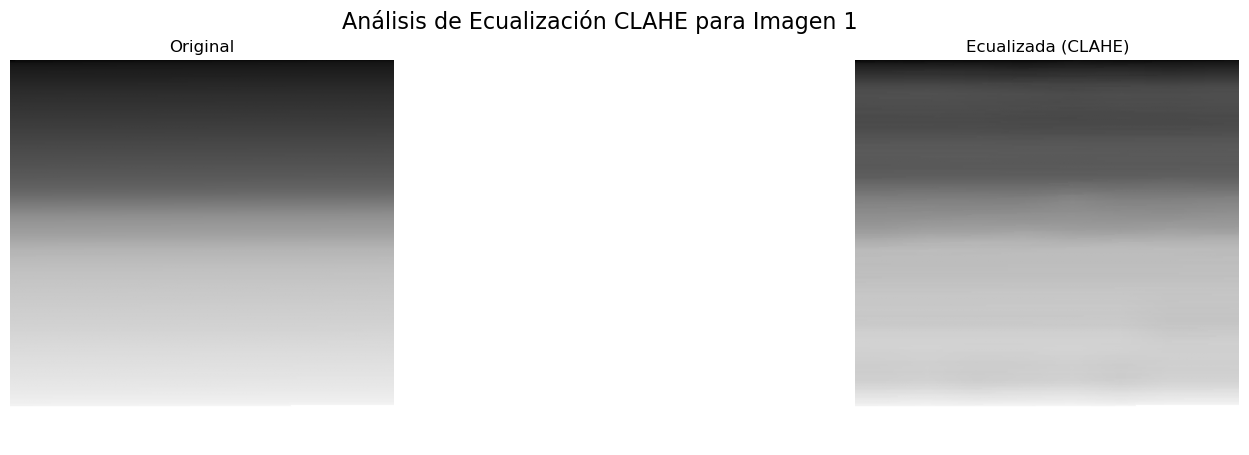

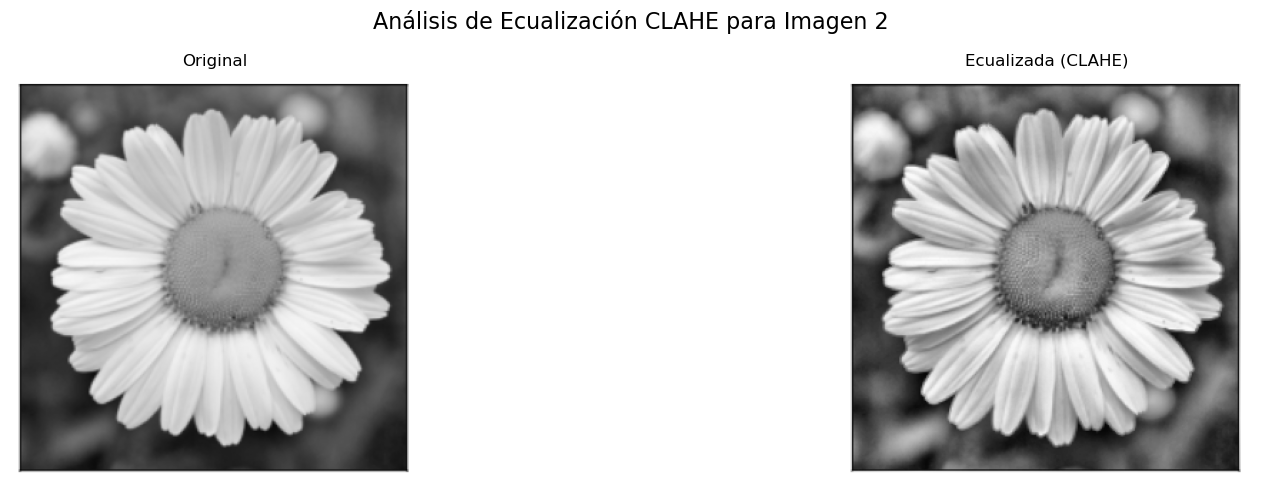

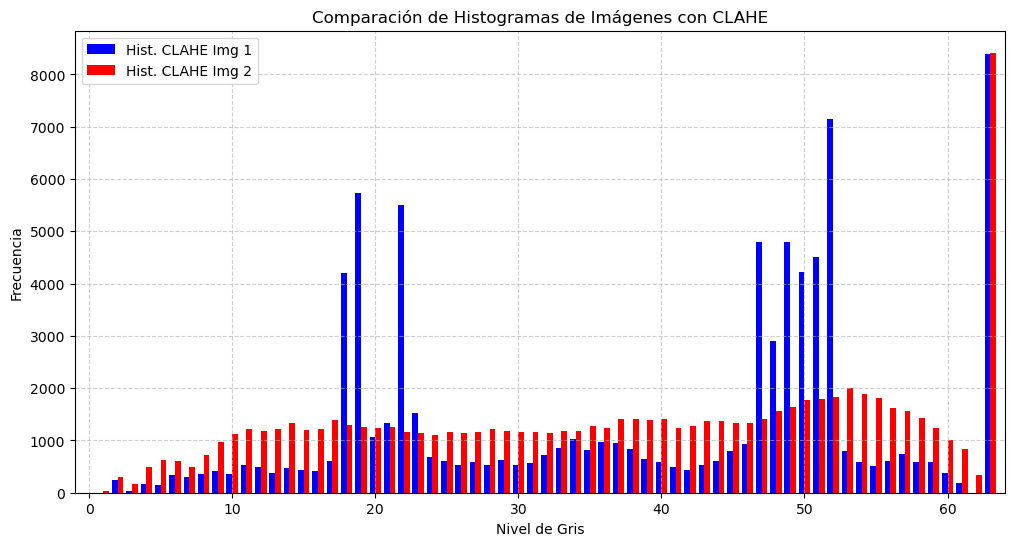

In [17]:
bins = 64
x_pos = np.arange(bins)
ancho_barra = 0.4

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# ==================================================================
# ANÁLISIS CLAHE PARA IMAGEN 1
# ==================================================================


fig1, axes1 = plt.subplots(1, 2, figsize=(20, 5))
fig1.suptitle('Análisis de Ecualización CLAHE para Imagen 1', fontsize=16)


img1_clahe = clahe.apply(img1_gray)
hist1_orig, _ = np.histogram(img1_gray.ravel(), bins, [0, 256])
hist1_clahe, _ = np.histogram(img1_clahe.ravel(), bins, [0, 256])


axes1[0].imshow(img1_gray, cmap='gray', vmin=0, vmax=255)
axes1[0].set_title('Original')
axes1[0].axis('off')

axes1[1].imshow(img1_clahe, cmap='gray', vmin=0, vmax=255)
axes1[1].set_title('Ecualizada (CLAHE)')
axes1[1].axis('off')


# ==================================================================
# ANÁLISIS CLAHE PARA IMAGEN 2
# ==================================================================


fig2, axes2 = plt.subplots(1, 2, figsize=(20, 5))
fig2.suptitle('Análisis de Ecualización CLAHE para Imagen 2', fontsize=16)


img2_clahe = clahe.apply(img2_gray)
hist2_orig, _ = np.histogram(img2_gray.ravel(), bins, [0, 256])
hist2_clahe, _ = np.histogram(img2_clahe.ravel(), bins, [0, 256])


axes2[0].imshow(img2_gray, cmap='gray', vmin=0, vmax=255)
axes2[0].set_title('Original')
axes2[0].axis('off')

axes2[1].imshow(img2_clahe, cmap='gray', vmin=0, vmax=255)
axes2[1].set_title('Ecualizada (CLAHE)')
axes2[1].axis('off')


plt.tight_layout()

# ==================================================================
# GRÁFICA COMPARATIVA FINAL DE HISTOGRAMAS CLAHE
# ==================================================================
plt.figure(figsize=(12, 6))


plt.bar(x_pos - ancho_barra/2, hist1_clahe, width=ancho_barra, color='blue', label='Hist. CLAHE Img 1')
plt.bar(x_pos + ancho_barra/2, hist2_clahe, width=ancho_barra, color='red', label='Hist. CLAHE Img 2')

plt.title('Comparación de Histogramas de Imágenes con CLAHE')
plt.xlabel('Nivel de Gris')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim([-1, bins])


plt.show()

### Conclusión Final: Superioridad del Análisis Local (CLAHE) frente al Global

El experimento final consistió en aplicar el algoritmo de ecualización adaptativa de histograma con contraste limitado (CLAHE) a las imágenes `img1_tp.png` y `img2_tp.png`. El objetivo era comparar los resultados de esta técnica avanzada con los obtenidos previamente mediante la ecualización de histograma global.

**1. Observación Principal**

El resultado más significativo de aplicar CLAHE es que, a diferencia de la ecualización global, los histogramas de las dos imágenes resultantes **ya no son idénticos**. Como se observa en la gráfica comparativa, si bien ambos histogramas  se extienden por todo el rango dinámico, sus formas y distribuciones presentan diferencias notables bin a bin.

Visualmente, ambas imágenes muestran una mejora de contraste significativa y natural, realzando los detalles de las células sin introducir artefactos notorios.

**2. Análisis de la Causa**

Esta divergencia en los resultados, partiendo de dos imágenes con histogramas originales idénticos, se debe a la naturaleza **local y adaptativa** del algoritmo CLAHE, en contraposición al enfoque global de la ecualización estándar.

* **Análisis Global:** La ecualización estándar calcula un único histograma para toda la imagen y aplica una sola transformación. Al partir de dos histogramas globales idénticos, el resultado estadístico también fue idénticamente global.

* **Análisis Local (CLAHE):** CLAHE, por otro lado, divide cada imagen en una cuadrícula de regiones más pequeñas y realiza una ecualización de contraste limitado de forma independiente en cada una. Dado que `Imagen 1` e `Imagen 2` poseen una **disposición espacial de píxeles diferente**, el contenido y, por lo tanto, el histograma local de las regiones correspondientes es distinto en cada imagen. Al aplicar transformaciones locales diferentes, el resultado final agregado (el histograma global de la imagen procesada) es necesariamente diferente para cada una.

**3. Conclusión Definitiva**

Este experimento demuestra de manera concluyente la superioridad de los métodos adaptativos como CLAHE para el análisis y la mejora de imágenes. Se ha probado que CLAHE es capaz de "ver" y adaptarse a las diferencias estructurales y espaciales que son invisibles para los métodos globales.

Al operar localmente, no solo produce una mejora de contraste visualmente más natural y detallada, sino que también genera un resultado estadístico único que refleja la composición espacial particular de la imagen de entrada. Esto lo convierte en una herramienta mucho más robusta y sensible para el procesamiento de imágenes del mundo real, capaz de diferenciar y procesar de manera única imágenes que los métodos globales considerarían idénticas.